<a href="https://colab.research.google.com/github/TahlilMahfuz/CSE4554-Machine_Learning/blob/main/200042158_LAB02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

filename='house_price_data.txt'
df = pd.read_csv(filename, sep=",", index_col=False)
df.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


Task 2

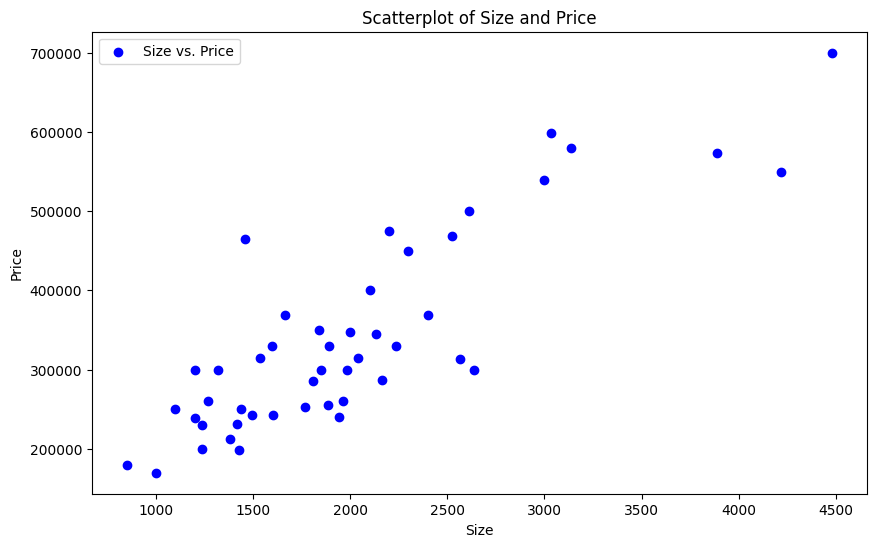

In [ ]:


# Extract the features
size = df['size']
bedrooms = df['bedrooms']
price = df['price']

# Create a scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(size, price, c='blue', label='Size vs. Price')

# Add labels and a legend
plt.xlabel('Size')
plt.ylabel('Price')
plt.legend()

# Show the plot
plt.title('Scatterplot of Size and Price')
plt.show()


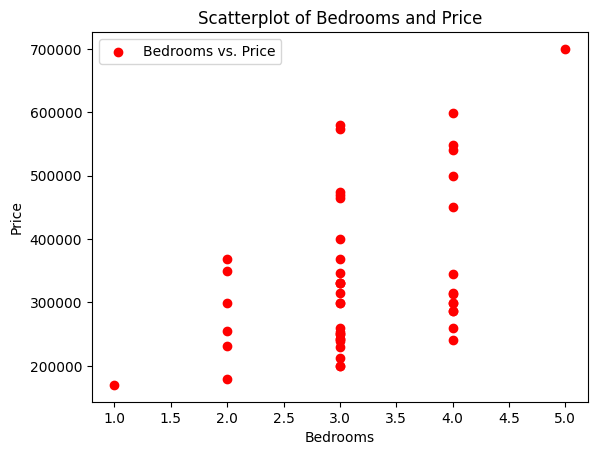

In [ ]:
plt.scatter(bedrooms, price, c='red', label='Bedrooms vs. Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.legend()

# Show the plot
plt.title('Scatterplot of Bedrooms and Price')
plt.show()

Task 3

In [ ]:
df.describe()

,size,bedrooms,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [ ]:
df['size'].var()

631551.8307123034

In [ ]:
df['bedrooms'].var()

0.5790934320074007

In [ ]:
df['price'].var()

15634976488.577242

Task 4

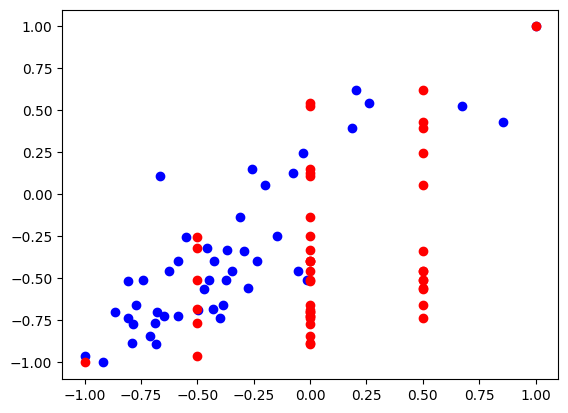

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Extract the features
features = df[['size', 'bedrooms', 'price']]

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# Fit and transform the features using the scaler
scaled_features = scaler.fit_transform(features)

# Create a new DataFrame with the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=['size', 'bedrooms', 'price'])

size = scaled_df['size']
bedrooms = scaled_df['bedrooms']
price = scaled_df['price']

plt.scatter(size, price, c='blue', label='size vs. Price')
plt.scatter(bedrooms, price, c='red', label='Bedrooms] vs. Price')

plt.show()

Task 5

In [ ]:


# Define the features (X) and the target variable (y)
X = scaled_df[['size', 'bedrooms']]
y = scaled_df['price']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

Task 6

In [ ]:

def hypothesis(X, theta):
    prediction = np.dot(X, theta)

    return prediction

Task 7

In [ ]:
def mean_squared_error(y_true, y_pred):
    # Ensure that both y_true and y_pred are NumPy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate the mean of squared errors
    mse = np.mean((y_true - y_pred) ** 2)

    return mse


def mean_absolute_error(y_true, y_pred):
    # Ensure that both y_true and y_pred are NumPy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate the absolute differences between true and predicted values
    absolute_errors = np.abs(y_true - y_pred)

    # Calculate the mean of absolute errors
    mae = absolute_errors.mean()

    return mae

Task 8

In [ ]:


def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)  # Number of training examples
    cost_history = []  # To store the MSE cost at each iteration

    for iteration in range(num_iterations):
        # Calculate the predicted values using the current theta.This is the H(X)
        predictions = hypothesis(X, theta)

        # Calculate the error (difference between predictions and actual values)
        errors = predictions - y

        # Calculate the gradient (derivative of the MSE cost function)
        gradient = (1 / m) * np.dot(X.T, errors)

        # Update theta using gradient descent
        theta -= learning_rate * gradient

        # Calculate and store the MSE cost
        mse_cost=mean_squared_error(y,predictions)
        cost_history.append(mse_cost)

    return theta, cost_history


Task 9

In [ ]:

# Initialize model parameters (theta) with zeros
theta = np.zeros(3)  # Three parameters: theta0 (intercept), theta1 (slope for 'size'), and theta2 (slope for 'bedrooms')

# Set hyperparameters
learning_rate = 0.1
num_iterations = 1000

# Add a bias term (intercept) to the feature matrix
X_bias = np.column_stack([np.ones(X_train.shape[0]), X_train])  # Add a column of ones for the bias term

# Define the gradient descent function (as provided earlier)

# Call the gradient descent function to find the best-fitted line
optimal_theta, cost_history = gradient_descent(X_bias, y_train, theta, learning_rate, num_iterations)

# Extract the optimized parameters
intercept, coef_size, coef_bedrooms = optimal_theta

print(optimal_theta)


[-0.00877599  0.94236319 -0.06450769]


Task 10

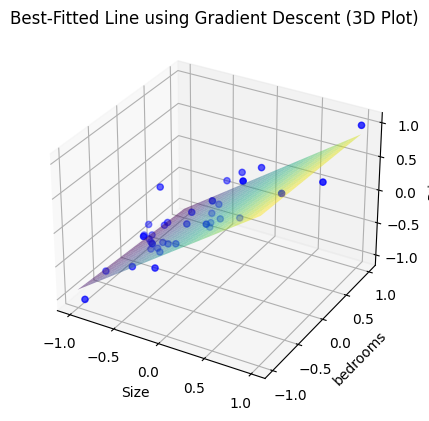

Optimized Intercept (Theta0): -0.008775986666356247
Optimized Coefficient for Size (Theta1): 0.9423631920120107
Optimized Coefficient for bedrooms (Theta2): -0.06450769214209855


In [ ]:
# Create a 3D scatter plot of the data points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['size'], X_train['bedrooms'], y_train, c='b', marker='o', label='Data Points')

# Create a meshgrid for the plane
size_range = np.linspace(min(X_train['size']), max(X_train['size']), 20)
bedrooms_range = np.linspace(min(X_train['bedrooms']), max(X_train['bedrooms']), 20)
size_mesh, bedrooms_mesh = np.meshgrid(size_range, bedrooms_range)

# Calculate the corresponding price values for the meshgrid using the optimized parameters
price_mesh = intercept + coef_size * size_mesh + coef_bedrooms * bedrooms_mesh

# Create a 3D surface plot for the best-fitted plane
ax.plot_surface(size_mesh, bedrooms_mesh, price_mesh, alpha=0.5, cmap='viridis', label='Best-Fitted Plane')

# Set labels for the axes
ax.set_xlabel('Size')
ax.set_ylabel('bedrooms')
ax.set_zlabel('Price')
ax.set_title('Best-Fitted Line using Gradient Descent (3D Plot)')



# Show the 3D plot
plt.show()

# Print the optimized parameters
print(f"Optimized Intercept (Theta0): {intercept}")
print(f"Optimized Coefficient for Size (Theta1): {coef_size}")
print(f"Optimized Coefficient for bedrooms (Theta2): {coef_bedrooms}")

Task 11

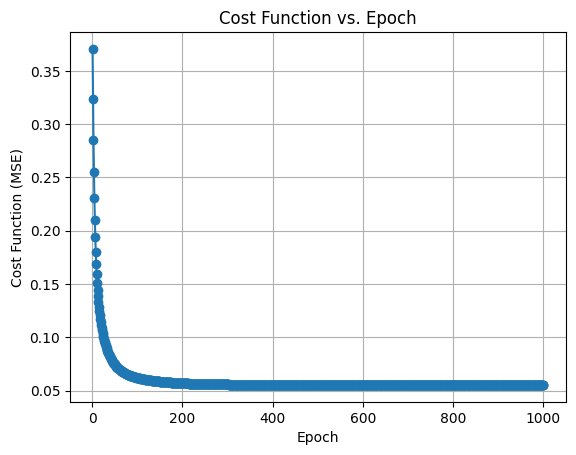

In [ ]:
# Initialize model parameters (theta) with zeros
theta = np.zeros(3)  # Three parameters: theta0 (intercept), theta1 (slope for 'size'), and theta2 (slope for 'bedroom')

# Set hyperparameters
learning_rate = 0.1
num_iterations = 1000

# Add a bias term (intercept) to the feature matrix
X_bias = np.column_stack([np.ones(X_train.shape[0]), X_train])  # Add a column of ones for the bias term

# Define the gradient descent function (as provided earlier)

# Initialize an empty list to store the cost at each epoch
cost_history = []

# Perform gradient descent and record the cost at each epoch
for epoch in range(num_iterations):
    # Call the gradient descent function to update theta and calculate the cost
    optimal_theta, cost = gradient_descent(X_bias, y_train, theta, learning_rate, 1)

    # Append the cost to the cost history list
    cost_history.append(cost)

    # Update theta for the next epoch
    theta = optimal_theta

# Plot the cost function versus the number of epochs
plt.plot(range(1, num_iterations + 1), cost_history, marker='o', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Cost Function (MSE)')
plt.title('Cost Function vs. Epoch')
plt.grid(True)
plt.show()


Task 12

Mean Squared Error (MSE): 0.0692145690577607
Mean Absolute Error (MAE): 0.196579469211422


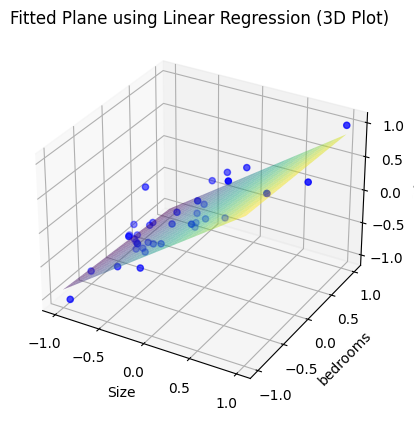

In [ ]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions using the trained model
y_pred = model.predict(X_test)

# Evaluate the model's performance using metrics like Mean Squared Error (MSE) and Mean Absolute Error (MAE)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

# Create a 3D figure for plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the actual prices in 3D space
ax.scatter(X_train['size'], X_train['bedrooms'], y_train, c='b', marker='o', label='Actual Prices')

# Create a meshgrid for plotting the fitted plane
size_range = np.linspace(min(X_train['size']), max(X_train['size']), 20)
bedrooms_range = np.linspace(min(X_train['bedrooms']), max(X_train['bedrooms']), 20)
size_mesh, bedrooms_mesh = np.meshgrid(size_range, bedrooms_range)



# Plot the fitted plane in 3D space
ax.plot_surface(size_mesh, bedrooms_mesh, price_mesh, alpha=0.5, cmap='viridis', label='Fitted Plane')

# Set labels for the axes
ax.set_xlabel('Size')
ax.set_ylabel('bedrooms')
ax.set_zlabel('Price')
ax.set_title('Fitted Plane using Linear Regression (3D Plot)')

plt.show()